In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####1. Data Exploration and Understanding:
• Dataset Overview:
1. Load the dataset and display the first 10 rows.

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


2. Identify the number of rows and columns in the dataset.

In [4]:
total_rows, total_columns = df.shape
print("Number of rows:", total_rows)
print("Number of columns:", total_columns)

Number of rows: 143
Number of columns: 9


3. List all the columns and their data types.

In [8]:
columns_with_datatypes = df.dtypes
print(columns_with_datatypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.

In [9]:
#finding the mean median and standard deviation of the score column
mean_of_score = df['score'].mean()
median_of_score = df['score'].median()
standard_dev_of_score = df['score'].std()

print("Mean Score:", mean_of_score)
print("Median Score:", median_of_score)
print("Standard Deviation of Score:", standard_dev_of_score)

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


2. Identify the country with the highest and lowest happiness scores.

In [11]:
country_with_highest_score = df.loc[df['score'].idxmax(), 'Country name']
country_with_lowest_score = df.loc[df['score'].idxmin(), 'Country name']

print("Country with the highest score:", country_with_highest_score)
print("Country with the lowest score:", country_with_lowest_score)

Country with the highest score: Finland
Country with the lowest score: Afghanistan


Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

In [13]:
missing_values = df.isnull().sum()
print("Total count of missing values in the respective column:")
print(missing_values)

Total count of missing values in the respective column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

In [22]:
filtered_ds = df[df['score'] > 7.5]
sorted_dataset = filtered_ds.sort_values(by='Log GDP per capita', ascending=False)
top_10_rows = sorted_dataset.head(10)
print(top_10_rows)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [26]:
happiness_categories = []
for score in df['score']:
    if (score < 4):
        happiness_categories.append('Low')
    elif (4 <= score <= 6):
        happiness_categories.append('Medium')
    else:
        happiness_categories.append('High')
df['Happiness Category'] = happiness_categories
print(df)

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

Text(0.5, 1.0, 'Top 10 happiest countries by Score')

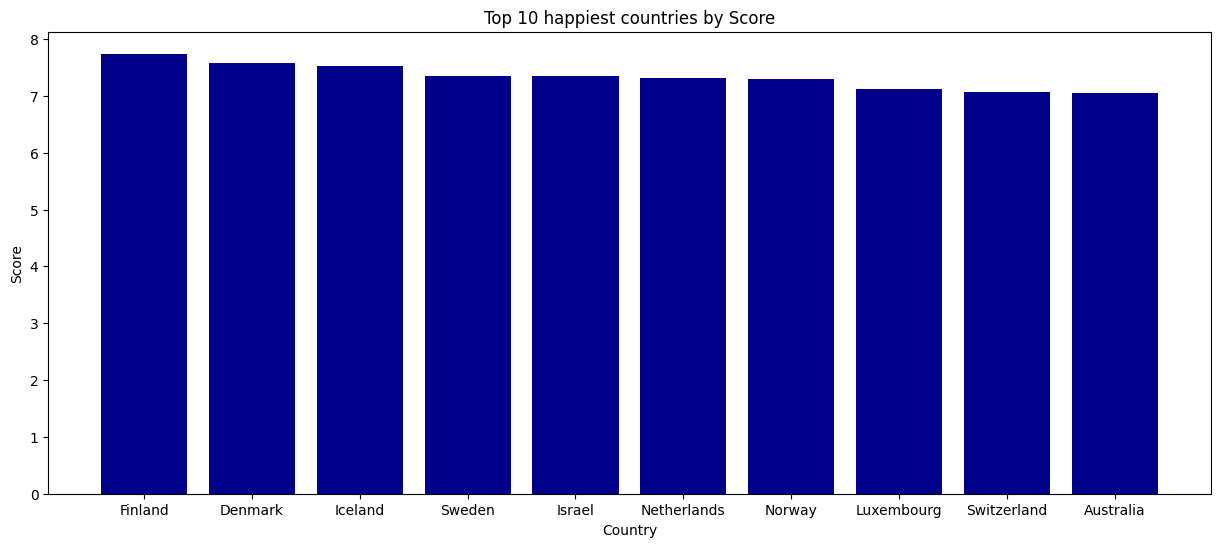

In [27]:
import matplotlib.pyplot as plt
bar_plot_data = df.nlargest(10, 'score')
plt.figure(figsize=(15, 6))
plt.bar(bar_plot_data['Country name'], bar_plot_data['score'], color = 'darkblue')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 happiest countries by Score')

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

Text(0.5, 1.0, 'Top 10 unhappiest countries by Score')

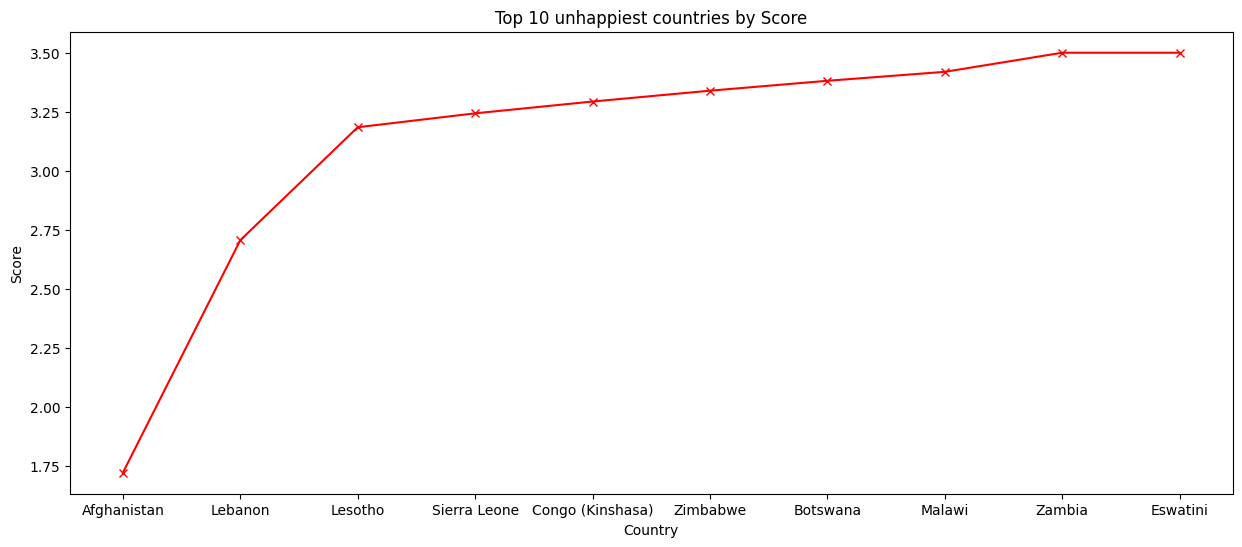

In [28]:
line_plot_data = df.nsmallest(10, 'score')
plt.figure(figsize=(15, 6))
plt.plot(line_plot_data['Country name'], line_plot_data['score'], marker='x', color='red')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 10 unhappiest countries by Score')

• Plot a histogram for the Score column to show its distribution and also interpret.


Text(0.5, 1.0, 'Distribution of Scores')

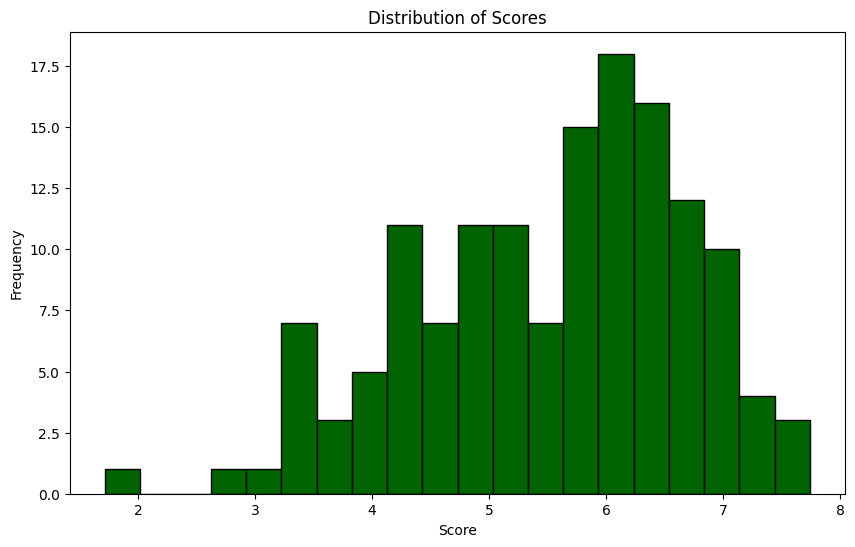

In [29]:
histogram_data = df['score']
plt.figure(figsize=(10, 6))
plt.hist(histogram_data, bins=20, edgecolor='black', color = 'darkgreen')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

Text(0.5, 1.0, 'Relationship between GDP per Capita and Score')

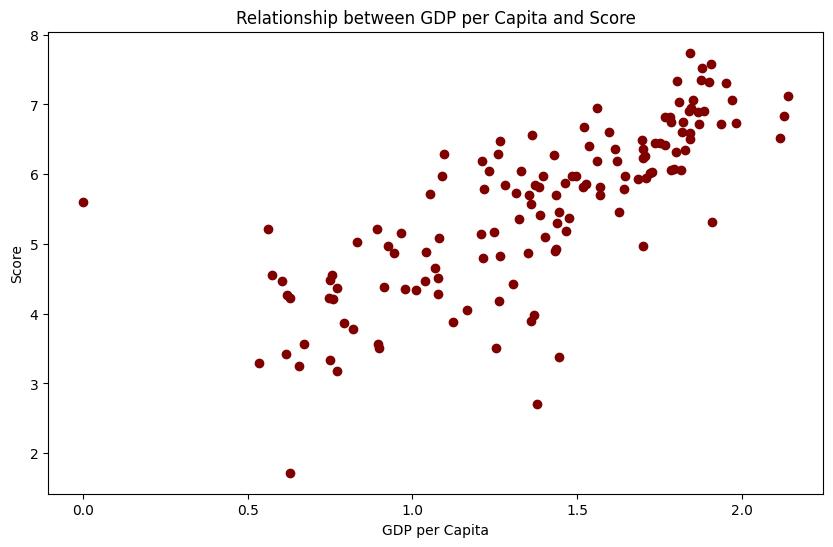

In [30]:
scatter_plot_data = df[['Log GDP per capita', 'score']]
plt.figure(figsize=(10, 6))
plt.scatter(scatter_plot_data['Log GDP per capita'], scatter_plot_data['score'], color='maroon')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.title('Relationship between GDP per Capita and Score')

##3.2 Problem - 2 - Some Advance Data Exploration Task:
###Task - 1 - Setup Task - Preparing the South-Asia Dataset:

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

In [31]:
import pandas as pd
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

In [32]:
filtered_dataset = df[df['Country name'].isin(south_asian_countries)]
print(filtered_dataset)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

3. Save the filtered dataframe as separate CSV files for future use.

In [33]:
filtered_dataset.to_csv('filtered_dataset.csv', index=False)

Task - 2 - Composite Score Ranking:
Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [35]:
composite_score = 0.40 * filtered_dataset['Log GDP per capita'] + 0.30 * filtered_dataset['Social support'] + 0.30 * filtered_dataset['Healthy life expectancy']
filtered_dataset['Composite Score'] = composite_score

<ipython-input-35-01bae57015b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Composite Score'] = composite_score


2. Rank the South Asian countries based on the Composite Score in descending order.

In [36]:
south_asian_countries_rank = filtered_dataset.sort_values(by='Composite Score', ascending=False)

3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

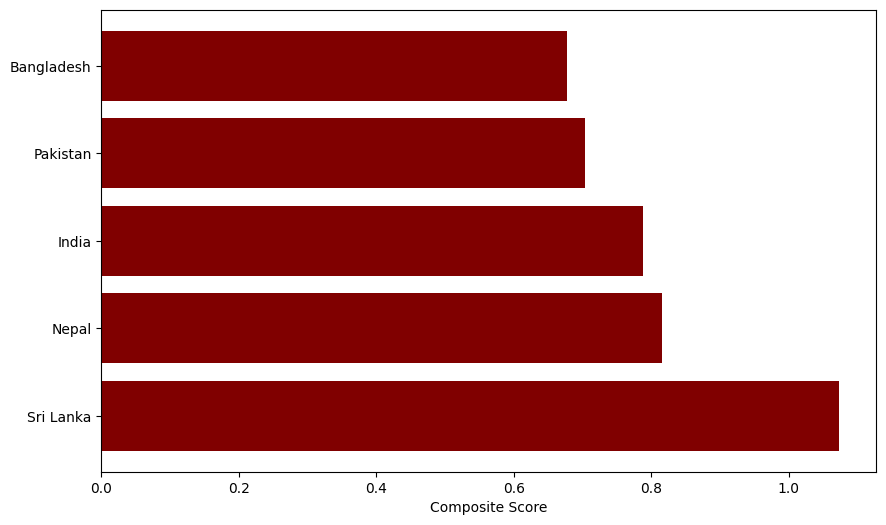

In [37]:
import matplotlib.pyplot as plt
top_5_countries = south_asian_countries_rank.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries['Country name'], top_5_countries['Composite Score'], color='maroon')
plt.xlabel('Composite Score')
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [38]:
rank_by_original_score=filtered_dataset['score'].rank(ascending=False)
rank_by_composite_score=filtered_dataset['Composite Score'].rank(ascending=False)

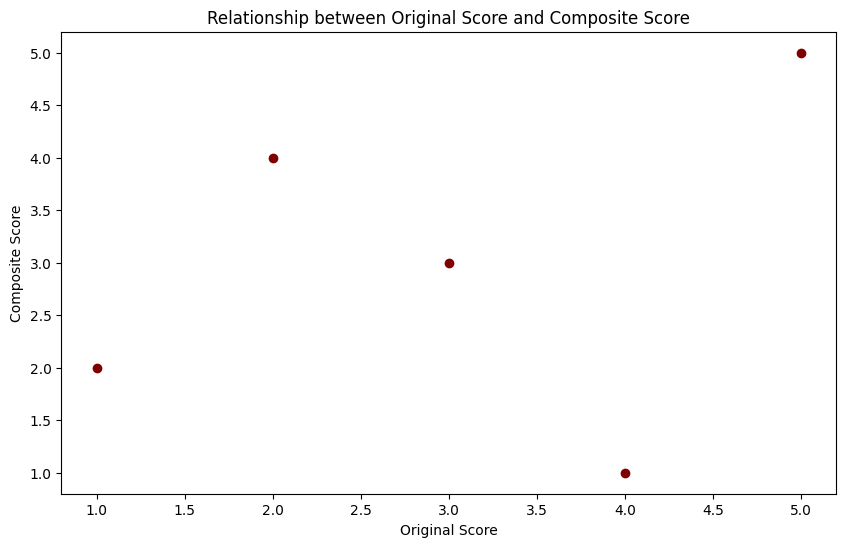

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(rank_by_original_score.head(), rank_by_composite_score.head(), color='maroon')
plt.xlabel('Original Score')
plt.ylabel('Composite Score')
plt.title('Relationship between Original Score and Composite Score')
plt.show()

The above scatter plot is used to determine whether the ranks based on the Composite Score are consistent with the original score. To achieve this, we first rank the original and composite scores and assign the variables rank_by_original_score and rank_by_composite_score from the filtered_dataset dataframe, which establish the ranks of the countries based on the original and composite scores.
We plotted Original rankings and Composite rankings on the X-axis and Y-axis respectively. The scatter plot above shows that the rankings are practically identical, however there is a minor difference between Pakistan and India.

###Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [40]:
Q1 = filtered_dataset['score'].quantile(0.25)
Q3 = filtered_dataset['score'].quantile(0.75)
iqr = Q3 - Q1

2. Define outliers using the 1.5 × IQR rule.

In [41]:
lower_bound = Q1 - 1.5 * iqr
print("Lower Bound: ", lower_bound)
upper_bound = Q3 + 1.5 * iqr
print("Upper Bound:", upper_bound)
outlier_countries = filtered_dataset[(filtered_dataset['score'] < lower_bound) | (filtered_dataset['score'] > upper_bound)]
print(outlier_countries)

Lower Bound:  2.963125000000001
Upper Bound: 5.432124999999999
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  
142           0.3238  


In [42]:
Q1_gdp = filtered_dataset['Log GDP per capita'].quantile(0.25)
Q3_gdp = filtered_dataset['Log GDP per capita'].quantile(0.75)
iqr_gdp = Q3_gdp - Q1_gdp
lower_bound_gdp = Q1_gdp - 1.5 * iqr_gdp
print(lower_bound_gdp)
upper_bound_gdp = Q3_gdp + 1.5 * iqr_gdp
print(upper_bound_gdp)
outlier_countries = filtered_dataset[(filtered_dataset['Log GDP per capita'] < lower_bound_gdp) | (filtered_dataset['Log GDP per capita'] > upper_bound_gdp)]
print(outlier_countries)

0.7449999999999999
1.401
    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628             0.0   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                           0.0       0.091   

     Perceptions of corruption  Dystopia + residual Happiness Category  \
142                      0.088                0.672                Low   

     Composite Score  
142           0.3238  


3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

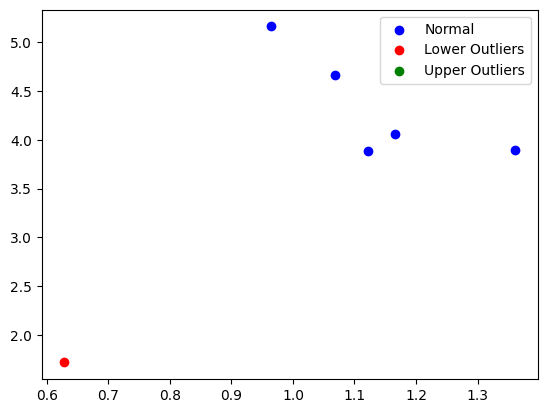

In [43]:
plt.scatter(
    filtered_dataset['Log GDP per capita'][(filtered_dataset['Log GDP per capita'] >= lower_bound_gdp) & (filtered_dataset['Log GDP per capita'] <= upper_bound_gdp) &
              (filtered_dataset['score'] >= lower_bound) & (filtered_dataset['score'] <= upper_bound)],
    filtered_dataset['score'][(filtered_dataset['Log GDP per capita'] >= lower_bound_gdp) & (filtered_dataset['Log GDP per capita'] <= upper_bound_gdp) &
                (filtered_dataset['score'] >= lower_bound) & (filtered_dataset['score'] <= upper_bound)],
    color='blue', label='Normal'
)

# Scatter plot for lower outliers
plt.scatter(
    filtered_dataset['Log GDP per capita'][(filtered_dataset['Log GDP per capita'] < lower_bound_gdp) | (filtered_dataset['score'] <lower_bound)],
    filtered_dataset['score'][(filtered_dataset['Log GDP per capita'] < lower_bound_gdp) | (filtered_dataset['score'] < lower_bound)],
    color='red', label='Lower Outliers'
)

# Scatter plot for upper outliers
plt.scatter(
    filtered_dataset['Log GDP per capita'][(filtered_dataset['Log GDP per capita'] > upper_bound_gdp) | (filtered_dataset['score'] > upper_bound)],
    filtered_dataset['score'][(filtered_dataset['Log GDP per capita'] > upper_bound_gdp) | (filtered_dataset['score'] > upper_bound)],
    color='green', label='Upper Outliers'
)
plt.legend()

4. Discuss the characteristics of these outliers and their potential impact on regional averages.

Observing all of the calculations and the scatter plot, Afghanistan has the lowest score and Log GDP per capita, indicating economic underdevelopment when compared to the other four South Asian countries. It also has low values in certain linked metrics.

Afghanistan's lower score and Log GDP per capita may cause regional averages to fall, misinterpreting South Asia's overall social progress and economic development.

##Task - 4 - Exploring Trends Across Metrics:
Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [44]:
correlation_score_freedom = filtered_dataset['score'].corr(filtered_dataset['Freedom to make life choices'])
correlation_score_generosity = filtered_dataset['score'].corr(filtered_dataset['Generosity'])
print("Correlation with Freedom to Make Life Choices:", correlation_score_freedom)
print("Correlation with Generosity:", correlation_score_generosity)

Correlation with Freedom to Make Life Choices: 0.8005185224163315
Correlation with Generosity: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

Text(0.5, 0, 'Freedom to Make Life Choices')

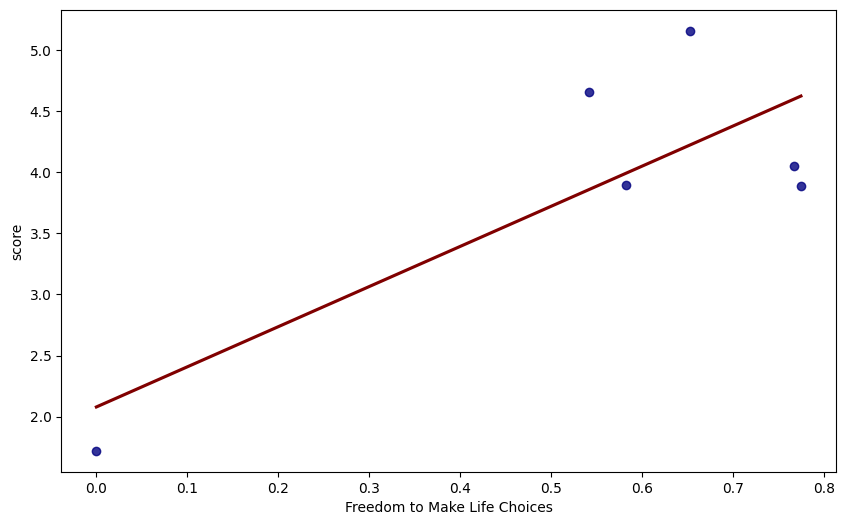

In [45]:
import seaborn as sns
scatter_plot_data = filtered_dataset[['Freedom to make life choices', 'score']]
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=scatter_plot_data, scatter_kws={'color': 'navy'}, line_kws={'color': 'maroon'}, ci=  None)
plt.xlabel('Freedom to Make Life Choices')

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

After calculating the Pearson Correlation Coefficients of both freedom to make life choices and Generosity with score, we can observe that the values of both the coefficients are close to 1 which indicates a strong positive relationship of freedom to make life choices with score and generosity with score. This results that the score increases when the freedom to make life choices increases, and when the generoisty increases, score increases as well.

We can see that the trendlines for freedom to make life choices and generosity with score is found to be upward slope which shows that it has a positive relation that is higher generosity or higher freedom to make life choices is associated with higher score.

Task - 5 - Gap Analysis:
Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [46]:
GDP_Score_Gap = filtered_dataset['Log GDP per capita'] - filtered_dataset['score']
filtered_dataset['GDP-Score Gap'] = GDP_Score_Gap
print(GDP_Score_Gap)

92    -4.193
107   -3.588
125   -2.888
127   -2.537
128   -2.764
142   -1.093
dtype: float64


<ipython-input-46-c3384adf0b88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['GDP-Score Gap'] = GDP_Score_Gap


2. Rank the South Asian countries by this gap in both ascending and descending order.

In [47]:
south_asian_countries_rank_descending = filtered_dataset.sort_values(by='GDP-Score Gap', ascending=False)
south_asian_countries_rank_ascending = filtered_dataset.sort_values(by='GDP-Score Gap', ascending=True)
print("Descending:\n")
print(south_asian_countries_rank_descending)

Descending:

    Country name  score  Log GDP per capita  Social support  \
142  Afghanistan  1.721               0.628           0.000   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
125        India  4.054               1.166           0.653   
107     Pakistan  4.657               1.069           0.600   
92         Nepal  5.158               0.965           0.990   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
142                    0.242                         0.000       0.091   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
125                    0.417                         0.767       0.174   
107                    0.321                         0.542       0.144   
92                     0.443                         0.653       0.209   

     Perceptions of corrup

In [48]:
print("Ascending:\n")
print(south_asian_countries_rank_ascending)

Ascending:

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
128   Bangladesh  3.886               1.122           0.249   
127    Sri Lanka  3.898               1.361           1.179   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
128                    0.513                         0.775       0.140   
127                    0.586                         0.583       0.144   
142                    0.242                         0.000       0.091   

     Perceptions of corrupt

3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

<BarContainer object of 3 artists>

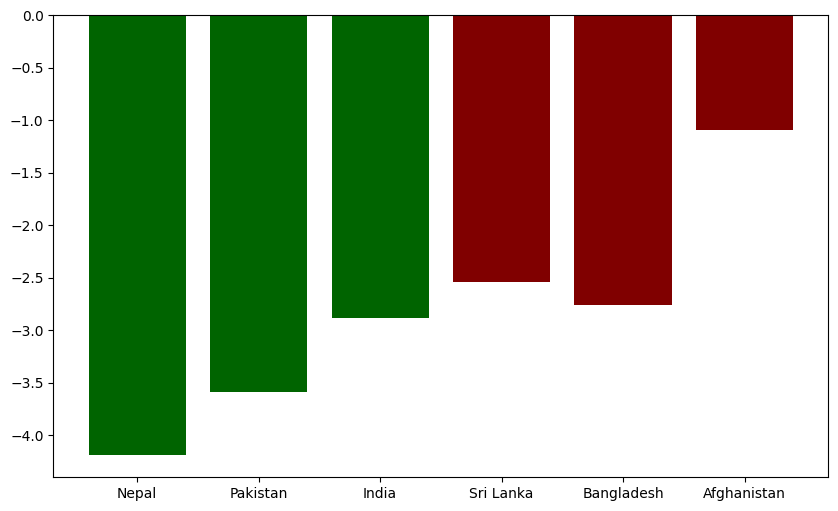

In [49]:
plt.figure(figsize=(10, 6))
top_3_positive_countries = filtered_dataset.head(3)
top_3_negative_countries = filtered_dataset.tail(3)
plt.bar(top_3_positive_countries['Country name'], top_3_positive_countries['GDP-Score Gap'], color='darkgreen')
plt.bar(top_3_negative_countries['Country name'], top_3_negative_countries['GDP-Score Gap'], color='maroon')

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Here, we know that the GDP-Score Gap is the difference between the values in the Log GDP per capita and score columns. The gap has the following implications for South Asian countries: the GDP-Score Gap values are all negative, indicating that the score is substantially larger than Log GDP per capita. So, the bar graph we created for the top three countries with positive and negative gaps extends downward to reflect negative values.

##3.3 Problem - 3 - Comparative Analysis:
Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [50]:
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_eastern_countries_df = df[df['Country name'].isin(middle_eastern_countries)]

In [51]:
middle_eastern_countries_df.dropna(inplace=True)
middle_eastern_countries_df

<ipython-input-51-493c7b7c6f68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_eastern_countries_df.dropna(inplace=True)


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


Complete the following task:
1. Descriptive Statistics:

• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.


In [52]:
mean_of_score_south_asia = filtered_dataset['score'].mean()
standard_dev_of_score_south_asia = filtered_dataset['score'].std()
print("Mean Score of South Asia:", mean_of_score_south_asia)
print("Standard Deviation of Score of South Asia:", standard_dev_of_score_south_asia)

mean_of_score_middle_east = middle_eastern_countries_df['score'].mean()
standard_dev_of_score_middle_east = middle_eastern_countries_df['score'].std()
print("Mean Score of Middle East:", mean_of_score_middle_east)
print("Standard Deviation of Score of Middle East:", standard_dev_of_score_middle_east)

Mean Score of South Asia: 3.895666666666667
Standard Deviation of Score of South Asia: 1.1770690152521504
Mean Score of Middle East: 5.351333333333333
Standard Deviation of Score of Middle East: 1.648656346847335


• Which region has higher happiness Scores on average?

In [53]:
if mean_of_score_south_asia > mean_of_score_middle_east:
  higher_happiness_score_region = "South Asia"
else :
  higher_happiness_score_region = "Middle East"

print("Region with higher happiness scores on average:", higher_happiness_score_region)

Region with higher happiness scores on average: Middle East


2. Top and Bottom Performers:

• Identify the top 3 and bottom 3 countries in each region based on the score.


In [54]:
top_3_based_on_score_south_asia = filtered_dataset.head(3)
bottom_3_based_on_score_south_asia = filtered_dataset.tail(3)

top_3_based_on_score_middle_east = middle_eastern_countries_df.head(3)
bottom_3_based_on_score_middle_east = middle_eastern_countries_df.tail(3)

• Plot bar charts comparing these charts

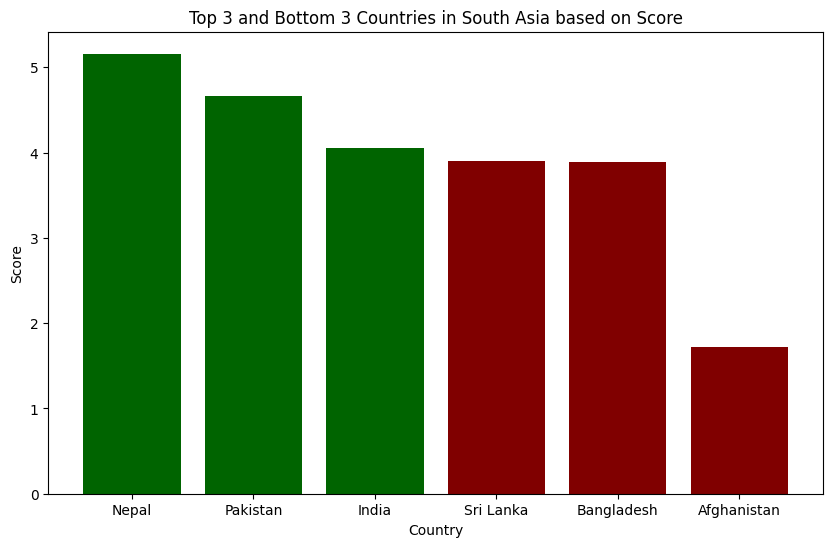

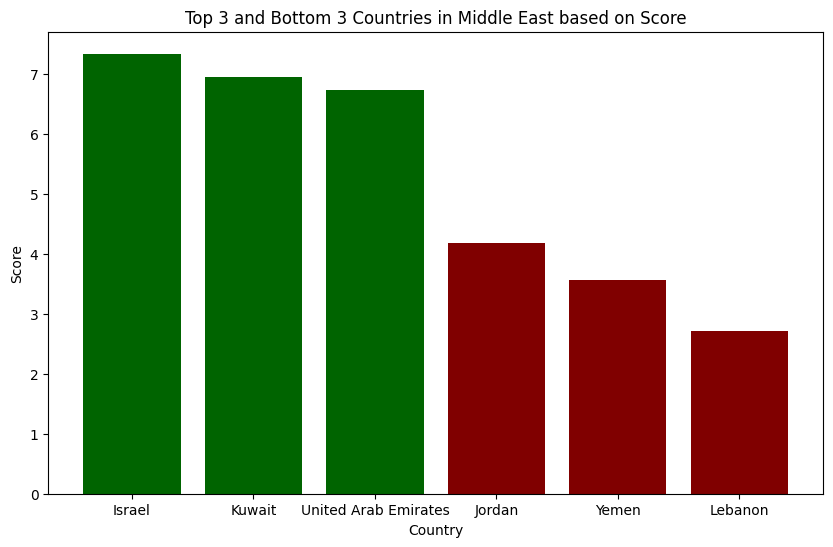

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(top_3_based_on_score_south_asia['Country name'], top_3_based_on_score_south_asia['score'], color='darkgreen')
plt.bar(bottom_3_based_on_score_south_asia['Country name'], bottom_3_based_on_score_south_asia['score'], color='maroon')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 3 and Bottom 3 Countries in South Asia based on Score')
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(top_3_based_on_score_middle_east['Country name'], top_3_based_on_score_middle_east['score'], color='darkgreen')
plt.bar(bottom_3_based_on_score_middle_east['Country name'], bottom_3_based_on_score_middle_east['score'], color='maroon')
plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Top 3 and Bottom 3 Countries in Middle East based on Score')
plt.show()

3. Metric Comparisons:

• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

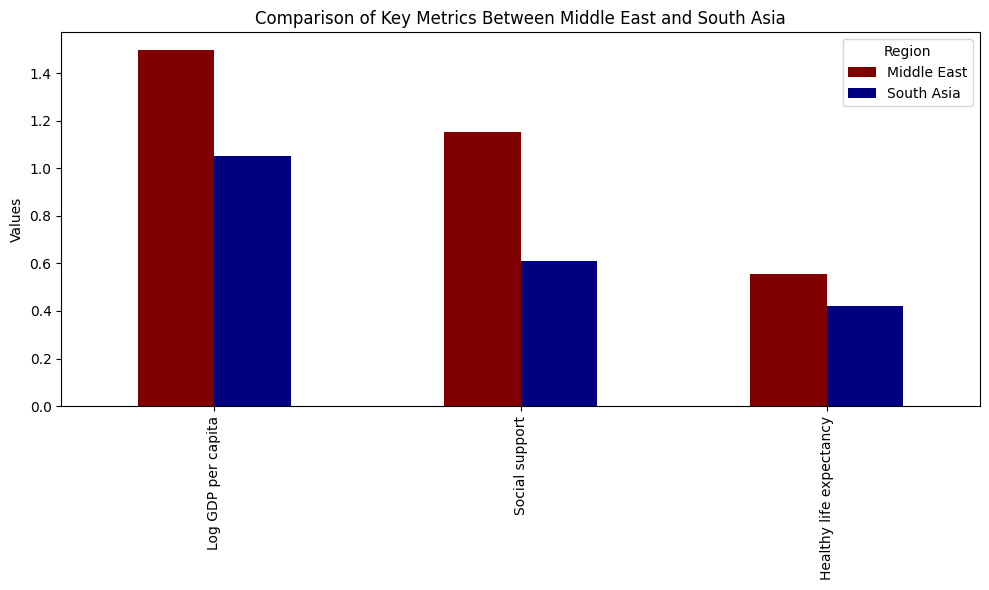

In [56]:
key_metric = ['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy']
middle_east_metric = middle_eastern_countries_df[key_metric].set_index('Country name')
south_asian_metric = filtered_dataset[key_metric].set_index('Country name')


middle_east_avg = middle_east_metric.mean()
south_asian_avg = south_asian_metric.mean()

comparison_df = pd.DataFrame({
    'Middle East': middle_east_avg,
    'South Asia': south_asian_avg
})
comparison_df
comp_bar = comparison_df.plot(kind='bar', figsize=(10, 6), color=['maroon', 'navy'])
plt.title('Comparison of Key Metrics Between Middle East and South Asia')
plt.ylabel('Values')
plt.legend(title='Region')
plt.tight_layout()

• Which metrics show the largest disparity between the two regions?

The comparison of important metrics between the Middle East and South Asia is shown in the bar graph above. We may observe that the two regions' values for the Social Support metric differ more. As a result, the biggest difference between the two regions is seen in social support.

4. Happiness Disparity:

• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.



In [57]:
#Range
range_of_score_south_asia = filtered_dataset['score'].max() - filtered_dataset['score'].min()
range_of_score_middle_east = middle_eastern_countries_df['score'].max() - middle_eastern_countries_df['score'].min()

print("Range of Score in South Asia:", range_of_score_south_asia)
print("Range of Score in Middle East:", range_of_score_middle_east)

cv_of_south_asian = (standard_dev_of_score_south_asia / mean_of_score_south_asia ) *100
cv_of_middle_east = (standard_dev_of_score_middle_east / mean_of_score_middle_east) *100

print("\nCoefficient of Variation of Score in South Asia: ", cv_of_south_asian)
print("Coefficient of Variation of Score in Middle East: ", cv_of_middle_east)

Range of Score in South Asia: 3.4370000000000003
Range of Score in Middle East: 4.634

Coefficient of Variation of Score in South Asia:  30.21482883337427
Coefficient of Variation of Score in Middle East:  30.808328395054225


• Which region has greater variability in happiness?

In [58]:
if cv_of_south_asian > cv_of_middle_east:
  greater_variability_region = "South Asia"
  print("Greater variability in happiness:", greater_variability_region)
else :
  greater_variability_region = "Middle East"
  print("Greater variability in happiness:", greater_variability_region)

Greater variability in happiness: Middle East


5. Correlation Analysis:

• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

In [59]:
correlation_score_freedom_south_asia = filtered_dataset['score'].corr(filtered_dataset['Freedom to make life choices'])
correlation_score_generosity_south_asia = filtered_dataset['score'].corr(filtered_dataset['Generosity'])

correlation_score_freedom_middle_east = middle_eastern_countries_df['score'].corr(middle_eastern_countries_df['Freedom to make life choices'])
correlation_score_generosity_middle_east = middle_eastern_countries_df['score'].corr(middle_eastern_countries_df['Generosity'])

print("\nCorrelation with Freedom to Make Life Choices in South Asia:", correlation_score_freedom_south_asia)
print("\nCorrelation with Generosity in South Asia:", correlation_score_generosity_south_asia)
print("\nCorrelation with Freedom to Make Life Choices in Middle East:", correlation_score_freedom_middle_east)
print("\nCorrelation with Generosity in Middle East:", correlation_score_generosity_middle_east)


Correlation with Freedom to Make Life Choices in South Asia: 0.8005185224163315

Correlation with Generosity in South Asia: 0.874512371253192

Correlation with Freedom to Make Life Choices in Middle East: 0.8632202433827544

Correlation with Generosity in Middle East: 0.6275236536964182


• Create scatter plots to visualize and interpret the relationships.

Text(0, 0.5, 'Score')

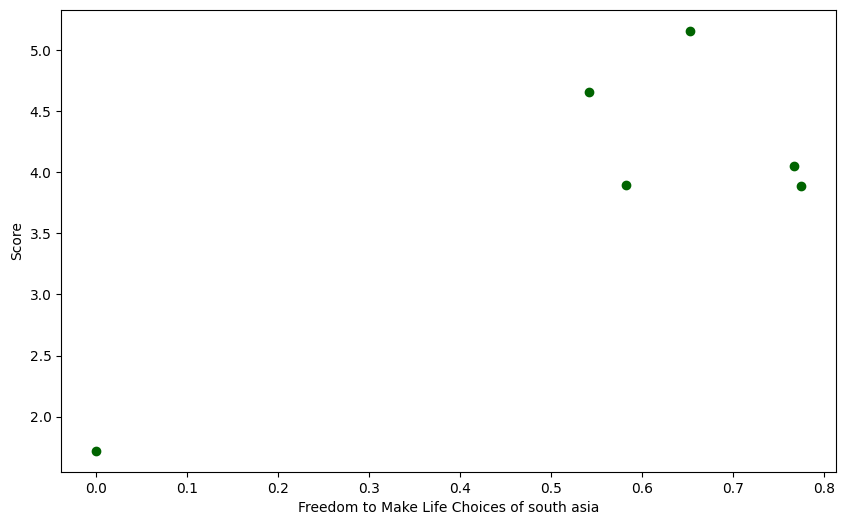

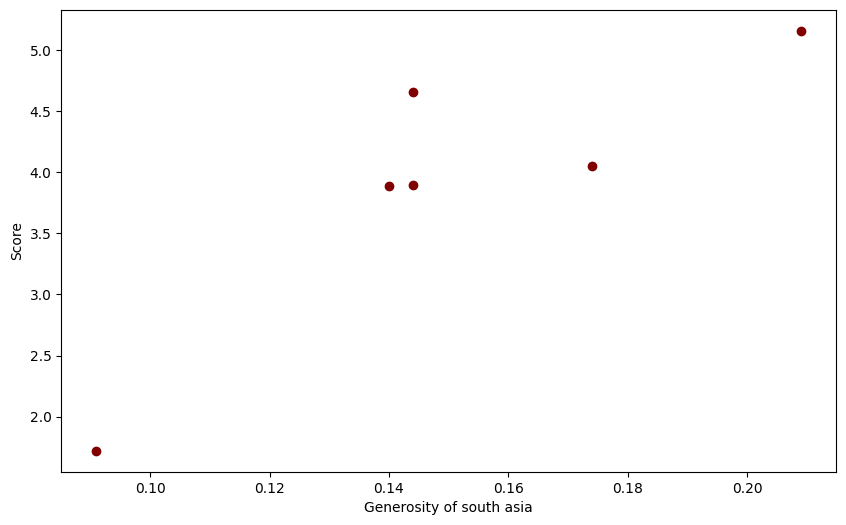

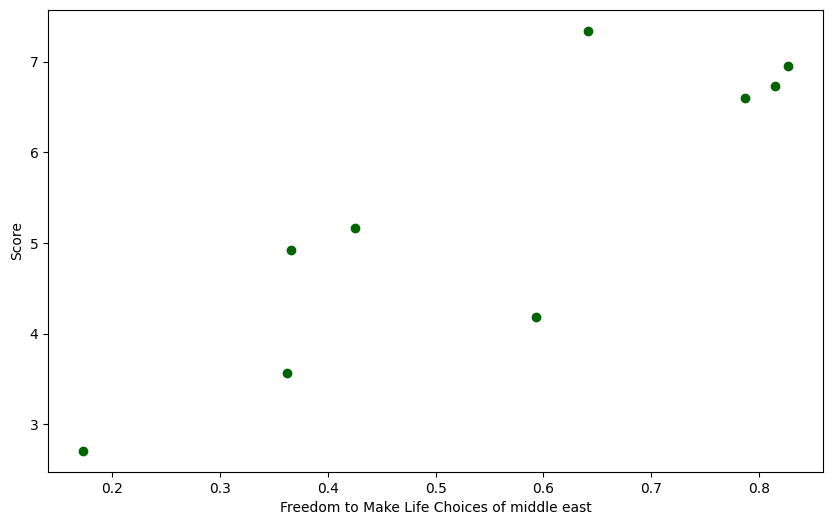

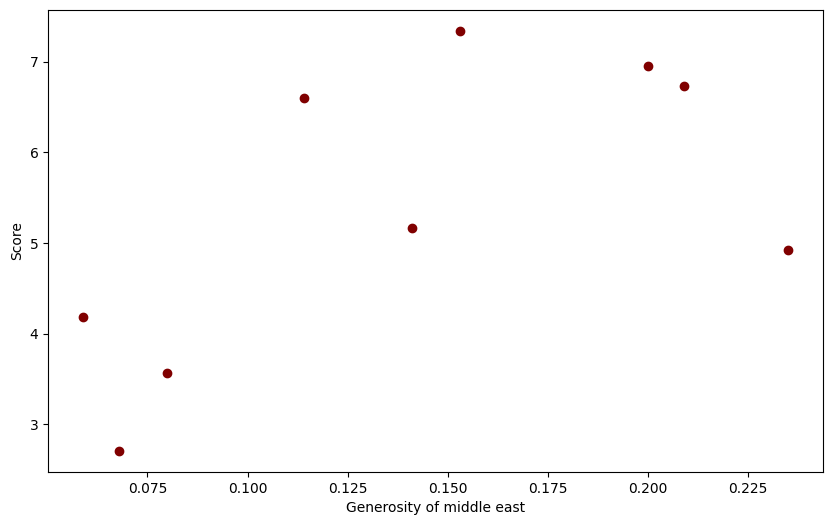

In [60]:
scatter_plot_of_freedom_south_asia = filtered_dataset[['Freedom to make life choices', 'score']]
plt.figure(figsize=(10, 6))
plt.scatter(scatter_plot_of_freedom_south_asia['Freedom to make life choices'], scatter_plot_of_freedom_south_asia['score'], color='darkgreen')
plt.xlabel('Freedom to Make Life Choices of south asia')
plt.ylabel('Score')

scatter_plot_of_generosity_south_asia = filtered_dataset[['Generosity', 'score']]
plt.figure(figsize=(10, 6))
plt.scatter(scatter_plot_of_generosity_south_asia['Generosity'], scatter_plot_of_generosity_south_asia['score'], color='maroon')
plt.xlabel('Generosity of south asia')
plt.ylabel('Score')

scatter_plot_of_freedom_middle_east = middle_eastern_countries_df[['Freedom to make life choices', 'score']]
plt.figure(figsize=(10, 6))
plt.scatter(scatter_plot_of_freedom_middle_east['Freedom to make life choices'], scatter_plot_of_freedom_middle_east['score'], color='darkgreen')
plt.xlabel('Freedom to Make Life Choices of middle east')
plt.ylabel('Score')

scatter_plot_of_generosity_middle_east = middle_eastern_countries_df[['Generosity', 'score']]
plt.figure(figsize=(10, 6))
plt.scatter(scatter_plot_of_generosity_middle_east['Generosity'], scatter_plot_of_generosity_middle_east['score'], color='maroon')
plt.xlabel('Generosity of middle east')
plt.ylabel('Score')

6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.

In [61]:
Q1 = middle_eastern_countries_df['score'].quantile(0.25)
Q3= middle_eastern_countries_df['score'].quantile(0.75)
iqr = Q3 - Q1
lower_bound = Q1 - 1.5 * iqr
print(lower_bound)
upper_bound = Q3 + 1.5 * iqr
print(upper_bound)
outlier_countries = middle_eastern_countries_df[(middle_eastern_countries_df['score'] < lower_bound) | (middle_eastern_countries_df['score'] > upper_bound)]
print(outlier_countries)

0.3655000000000004
10.5535
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category]
Index: []


In [62]:
Q1_gdp = middle_eastern_countries_df['Log GDP per capita'].quantile(0.25)
Q3_gdp= middle_eastern_countries_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = Q3_gdp - Q1_gdp
lower_bound_gdp = Q1 - 1.5 * iqr
print(lower_bound_gdp)
upper_bound_gdp = Q3_gdp + 1.5 * iqr_gdp
print(upper_bound_gdp)
outlier_countries = middle_eastern_countries_df[(middle_eastern_countries_df['Log GDP per capita'] < lower_bound_gdp) | (middle_eastern_countries_df['Log GDP per capita'] > upper_bound_gdp)]
print(outlier_countries)

0.3655000000000004
2.712
Empty DataFrame
Columns: [Country name, score, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual, Happiness Category]
Index: []


• Plot these outliers and discuss their implications.

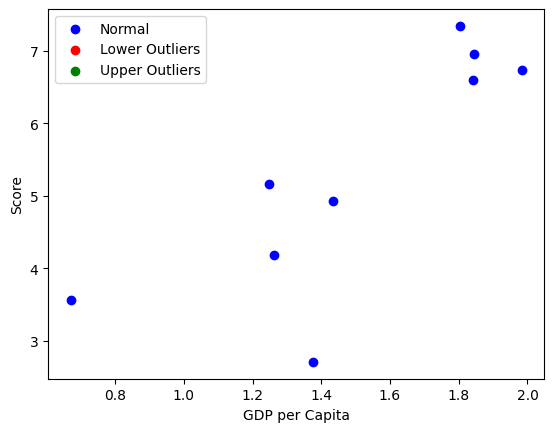

In [63]:
plt.scatter(
    middle_eastern_countries_df['Log GDP per capita'][(middle_eastern_countries_df['Log GDP per capita'] >= lower_bound_gdp) & (middle_eastern_countries_df['Log GDP per capita'] <= upper_bound_gdp) &
              (middle_eastern_countries_df['score'] >= lower_bound) & (middle_eastern_countries_df['score'] <= upper_bound)],
    middle_eastern_countries_df['score'][(middle_eastern_countries_df['Log GDP per capita'] >= lower_bound_gdp) & (middle_eastern_countries_df['Log GDP per capita'] <= upper_bound_gdp) &
                (middle_eastern_countries_df['score'] >= lower_bound) & (middle_eastern_countries_df['score'] <= upper_bound)],
    color='blue', label='Normal'
)

# Scatter plot for lower outliers
plt.scatter(
    middle_eastern_countries_df['Log GDP per capita'][(middle_eastern_countries_df['Log GDP per capita'] < lower_bound_gdp) | (middle_eastern_countries_df['score'] <lower_bound)],
    middle_eastern_countries_df['score'][(middle_eastern_countries_df['Log GDP per capita'] < lower_bound_gdp) | (middle_eastern_countries_df['score'] < lower_bound)],
    color='red', label='Lower Outliers'
)

# Scatter plot for upper outliers
plt.scatter(
    middle_eastern_countries_df['Log GDP per capita'][(middle_eastern_countries_df['Log GDP per capita'] > upper_bound_gdp) | (middle_eastern_countries_df['score'] > upper_bound)],
    middle_eastern_countries_df['score'][(middle_eastern_countries_df['Log GDP per capita'] > upper_bound_gdp) | (middle_eastern_countries_df['score'] > upper_bound)],
    color='green', label='Upper Outliers'
)
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()

7. Visualization:

• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

Text(0.5, 1.0, 'Distribution of Score between South Asia and Middle East')

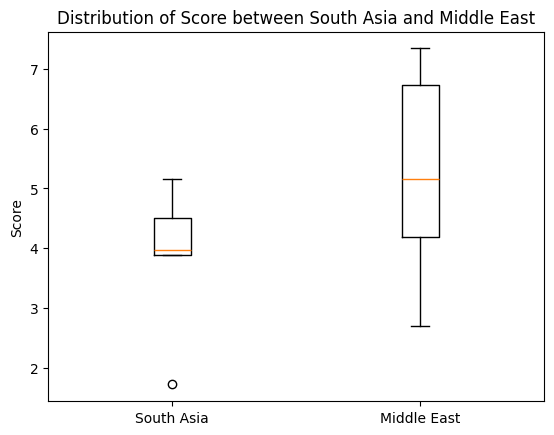

In [64]:
plt.boxplot([filtered_dataset['score'], middle_eastern_countries_df['score']], labels=['South Asia', 'Middle East'])
plt.ylabel('Score')
plt.title('Distribution of Score between South Asia and Middle East')

• Interpret the key differences in distribution shapes, medians, and outliers.

###Shape:
The box plot's length indicates the interquartile range (IQR), and the Middle East region has a higher IQR and a wider range of scores than South Asia. The range of non-outlier data that falls between the lower and higher bounds is indicated by the margins outside the box. Compared to the Middle East, South Asia has less variety because its whiskers are often shorter.

###Median:
We can see from the boxplot above that the middle line inside the Middle East box is higher. This indicates that, in comparison to South Asia, the Middle East region has a higher average score.

###Outliers:
The dots outside the whiskers are known as outliers. We can see that the Middle East region has no lower outliers, whereas South Asia has one below the bottom whisker, indicating the occurrence of lower outliers. This suggests that there is a nation in the South Asian region with an exceptionally low score.